##**Working 1 Procesamiento Digital de Imagenes**

- Tomas Jimenez Alvarez.

In [ ]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir

    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
load_data('1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz')

--2023-09-21 02:37:52--  https://docs.google.com/uc?export=download&confirm=t&id=1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz
Resolving docs.google.com (docs.google.com)... 142.250.107.101, 142.250.107.113, 142.250.107.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.107.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2eq67kmscc5nra0v6llj4bp53kkep1vl/1695263850000/06154535922612881248/*/1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz?e=download&uuid=9a01cb05-0725-44ad-8366-357ad981df73 [following]
--2023-09-21 02:37:52--  https://doc-00-60-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2eq67kmscc5nra0v6llj4bp53kkep1vl/1695263850000/06154535922612881248/*/1BjdSg6XPHoC5g6NIvDHUEeYb2oK8BjJz?e=download&uuid=9a01cb05-0725-44ad-8366-357ad981df73
Resolving doc-00-60-docs.googleusercontent.com (doc-00-60-docs.googleusercontent.com)... 74.125.197.1

### 1. Construir una función debidamente documentada, que reciba un parámetro llamado "color", con el cual se indique los colores de caramelos que se quieren mostrar en la siguiente imagen(60%):

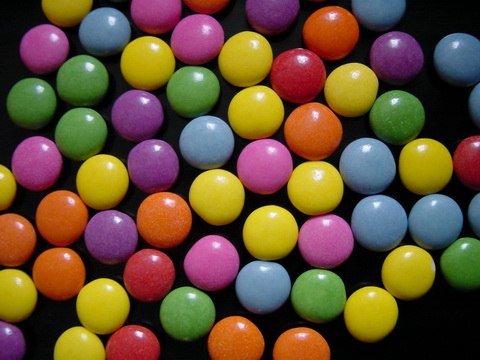


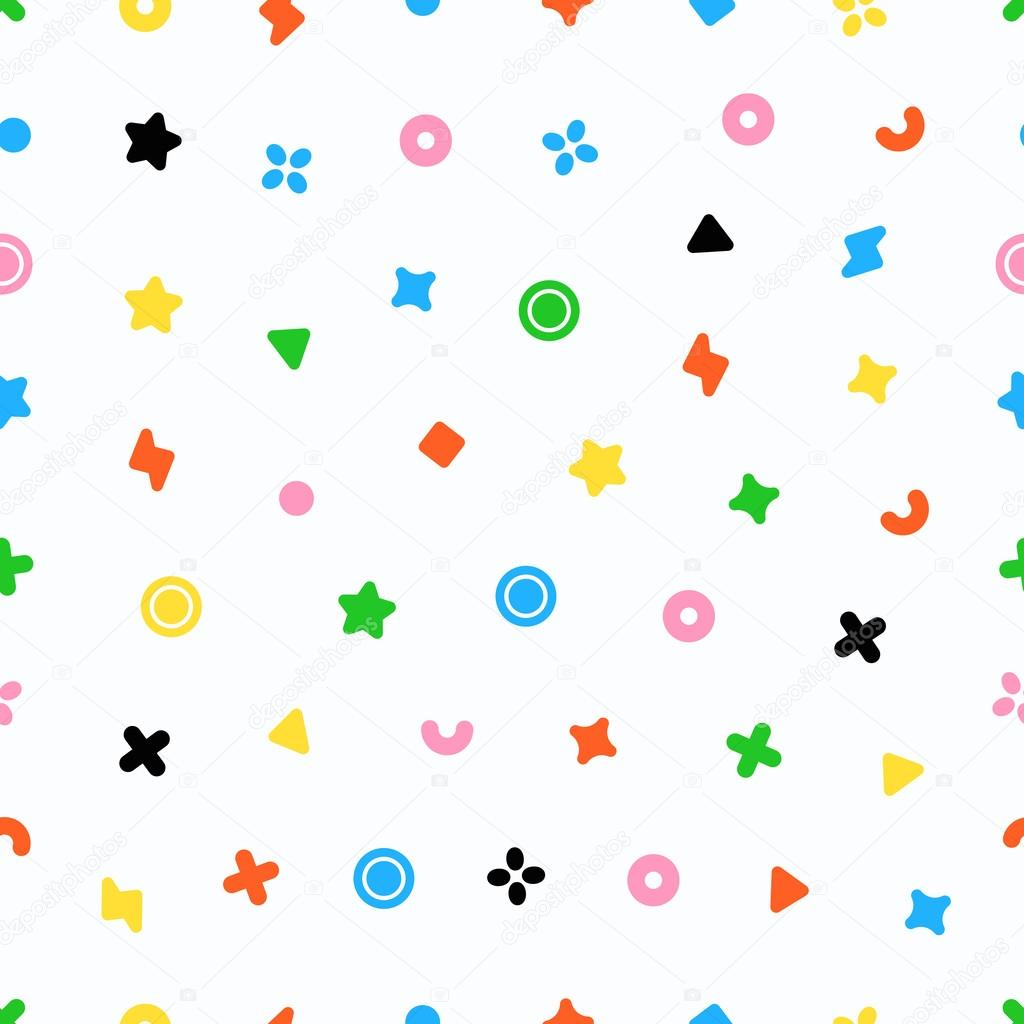





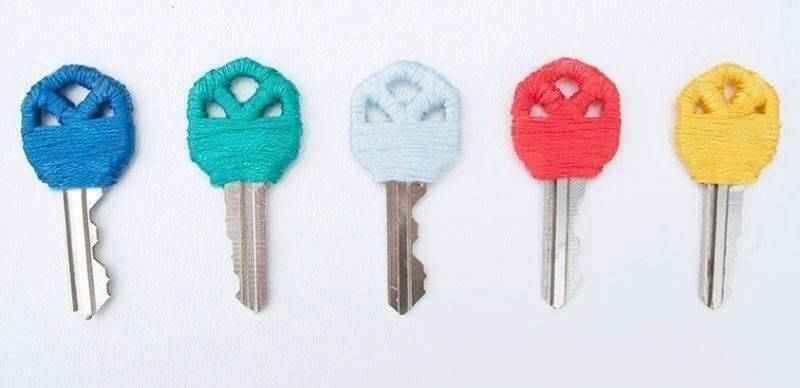
Los posibles valores que puede tomar el parámetro "color" son:

- Amarillo.
- Verde.
- Azul.
- Purpura.
- Rosado.
- Rojo.
- Naranja.
- Todas sus posibles combinaciones. Ej: Rojo y Amarillo, Rojo, Amarillo y Purpura

Al final de cada una de las anteriores operaciones, se recomienda aplicar los respectivos filtros morfólogicos vistos en clase, para limpiar residuos de colores no deseados y para definir bien la forma de los carámelos que se desean mostrar.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('/content/Colors_.jpg')
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir rangos de color para diferentes colores
amarillo_bajo = np.array([20, 50, 50], np.uint8)
amarillo_alto = np.array([32, 255, 255], np.uint8)
verde_bajo = np.array([36, 50, 50], np.uint8)
verde_alto = np.array([72, 255, 255], np.uint8)
rojo_bajo = np.array([172, 80, 100], np.uint8)
rojo_alto = np.array([180, 255, 255], np.uint8)
azul_bajo = np.array([90, 50, 50], np.uint8)
azul_alto = np.array([130, 255, 255], np.uint8)
morado_bajo = np.array([135, 50, 50], np.uint8)#([147, 50, 50], np.uint8)
morado_alto = np.array([156, 255, 255], np.uint8)
naranja_bajo = np.array([0, 20, 20], np.uint8)
naranja_alto = np.array([15, 255, 255], np.uint8)
rosado_bajo = np.array([155, 50, 50], np.uint8)
rosado_alto = np.array([165, 255, 255], np.uint8)

# Crear máscaras para diferentes colores -> Filtro que se pone encima de la im original para ver determinado color
mascara_amarillo = cv2.inRange(imghsv, amarillo_bajo, amarillo_alto)
mascara_verde = cv2.inRange(imghsv, verde_bajo, verde_alto)
mascara_rojo = cv2.inRange(imghsv, rojo_bajo, rojo_alto)
mascara_azul = cv2.inRange(imghsv, azul_bajo, azul_alto)
mascara_rosado = cv2.inRange(imghsv, rosado_bajo, rosado_alto)
mascara_naranja = cv2.inRange(imghsv, naranja_bajo, naranja_alto)
mascara_morado = cv2.inRange(imghsv, morado_bajo, morado_alto)

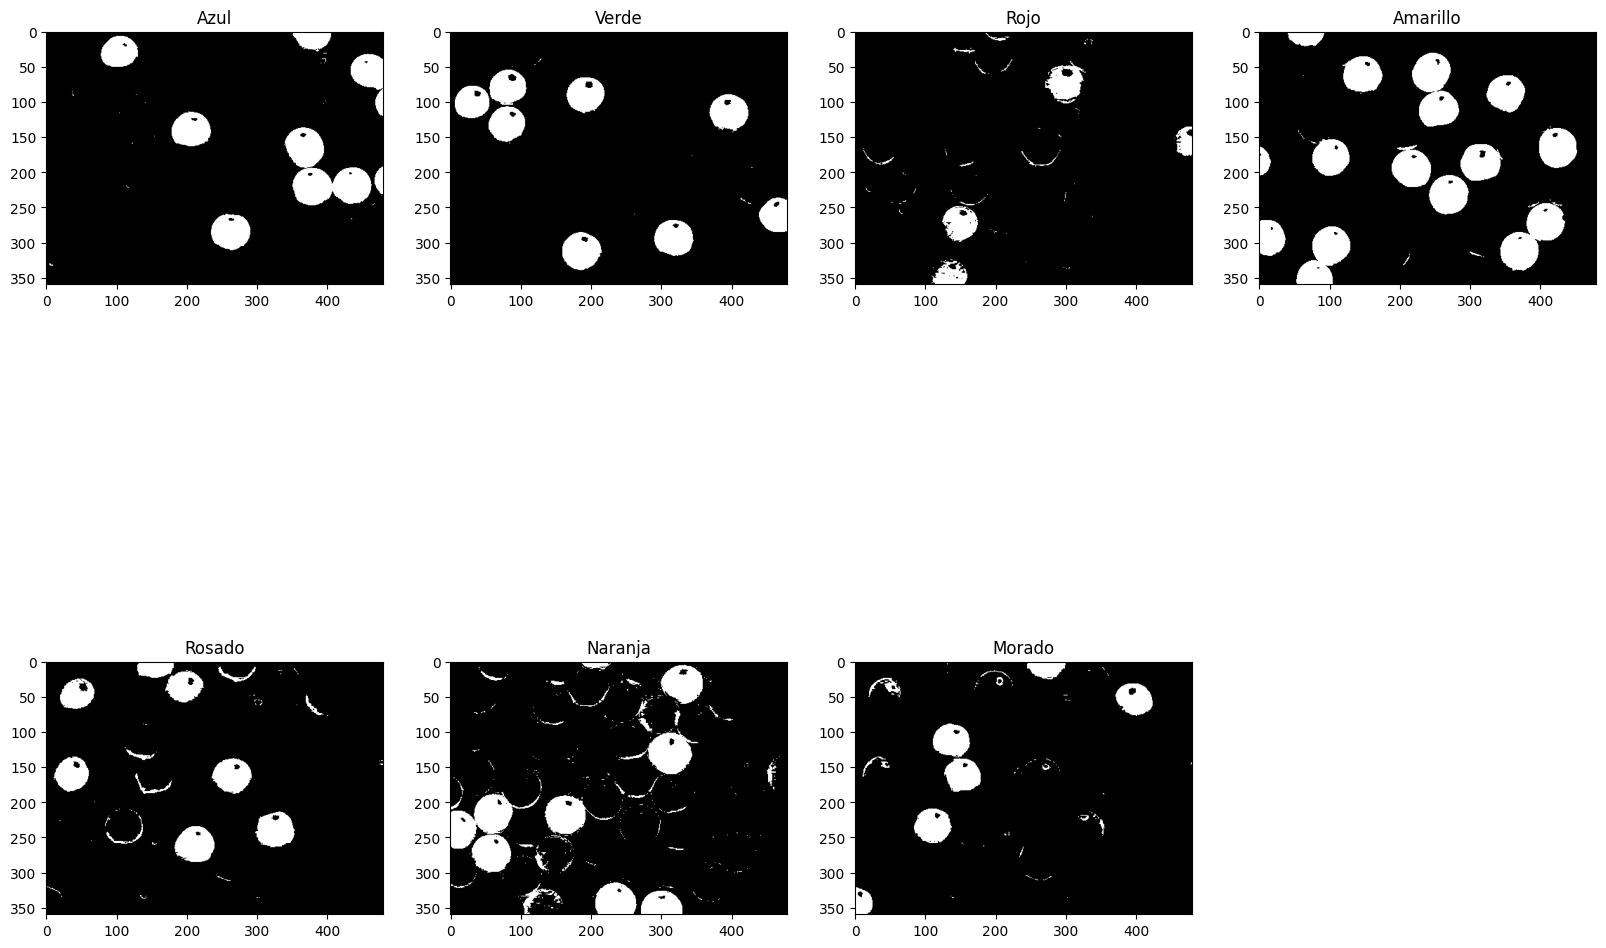

In [ ]:
#@markdown Ploteo de las mascaras
# Convertir las máscaras HSV a imágenes BGR
mascara_amarillo_bgr = cv2.cvtColor(mascara_amarillo, cv2.COLOR_GRAY2BGR)
mascara_verde_bgr = cv2.cvtColor(mascara_verde, cv2.COLOR_GRAY2BGR)
mascara_rojo_bgr = cv2.cvtColor(mascara_rojo, cv2.COLOR_GRAY2BGR)
mascara_azul_bgr = cv2.cvtColor(mascara_azul, cv2.COLOR_GRAY2BGR)
mascara_morado_bgr = cv2.cvtColor(mascara_morado, cv2.COLOR_GRAY2BGR)
mascara_naranja_bgr = cv2.cvtColor(mascara_naranja, cv2.COLOR_GRAY2BGR)
mascara_rosado_bgr = cv2.cvtColor(mascara_rosado, cv2.COLOR_GRAY2BGR)


# Mostrar las máscaras con diferentes colores
plt.subplot(241), plt.imshow(mascara_azul_bgr), plt.title('Azul')
plt.subplot(242), plt.imshow(mascara_verde_bgr), plt.title('Verde')
plt.subplot(243), plt.imshow(mascara_rojo_bgr), plt.title('Rojo')
plt.subplot(244), plt.imshow(mascara_amarillo_bgr), plt.title('Amarillo')
plt.subplot(245), plt.imshow(mascara_rosado_bgr), plt.title('Rosado')
plt.subplot(246), plt.imshow(mascara_naranja_bgr), plt.title('Naranja')
plt.subplot(247), plt.imshow(mascara_morado_bgr), plt.title('Morado')

# Ajustar el tamaño de la figura para que las imágenes sean visibles
fig = plt.gcf()
fig.set_size_inches(20, 15)

# Mostrar la figura
plt.show()

Ingrese el color de los caramelos (puede ser 'amarillo', 'verde', 'azul', 'purpura', 'rosado', 'rojo', 'naranja' o una combinación de estos colores separados por espacios): morado verde azul
En formato HSV


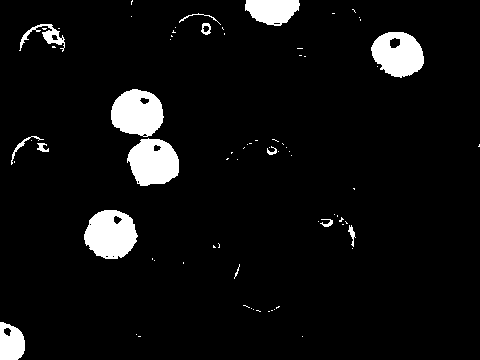

Aca hago erosion


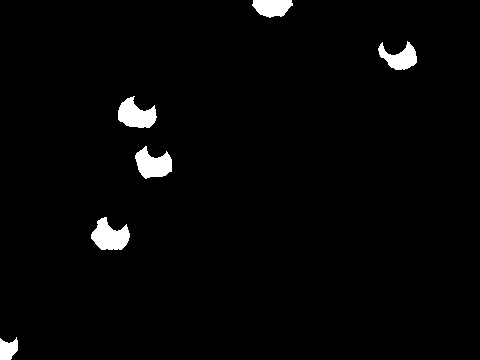

Aca hago dilatacion


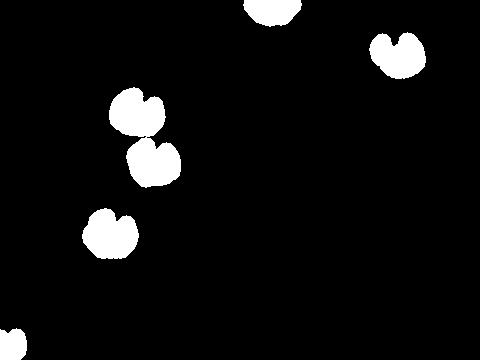

Aca hago dilatacion


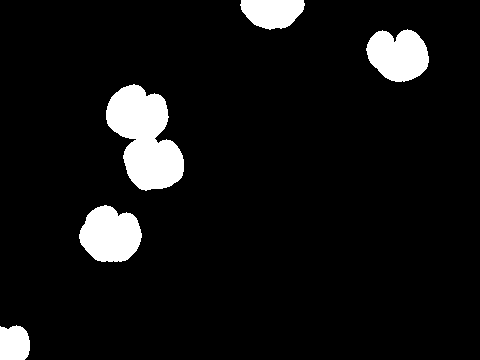

En formato HSV


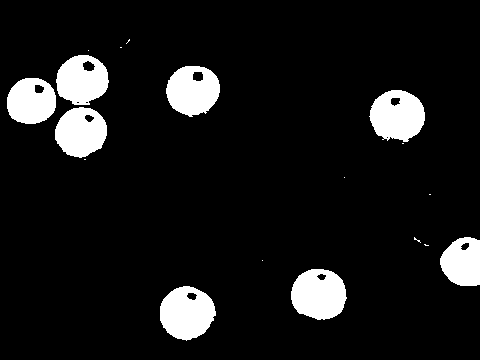

ENTRE AL VERDE
Aca hago erosion


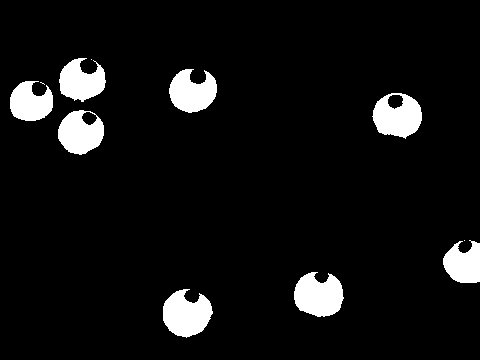

Aca hago dilatacion


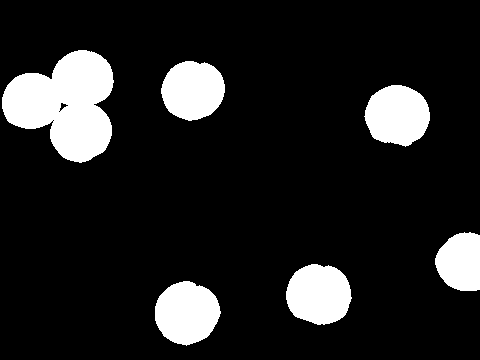

Aca hago erosion


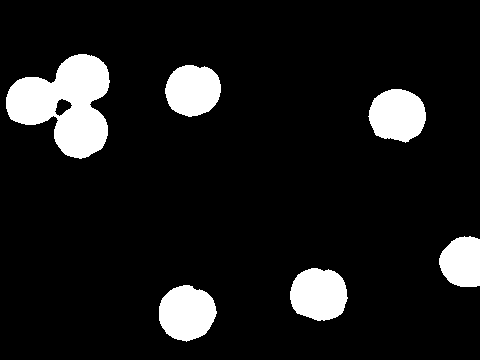

En formato HSV


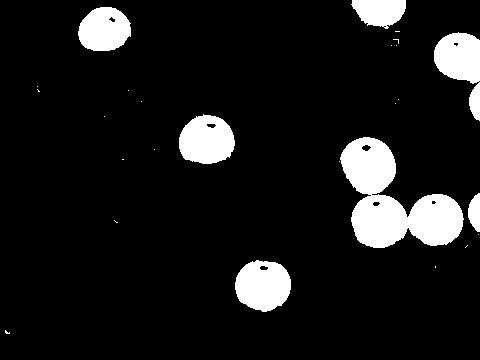

Aca hago erosion


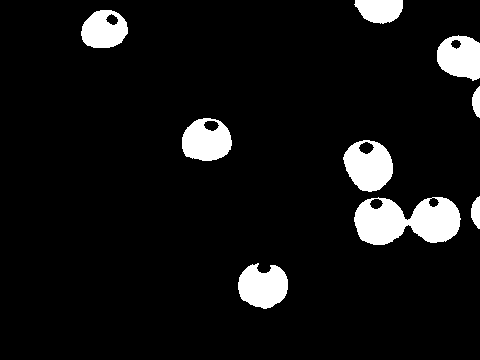

Aca hago dilatacion


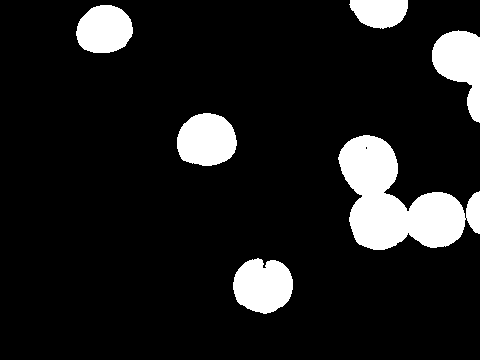

Aca hago dilatacion


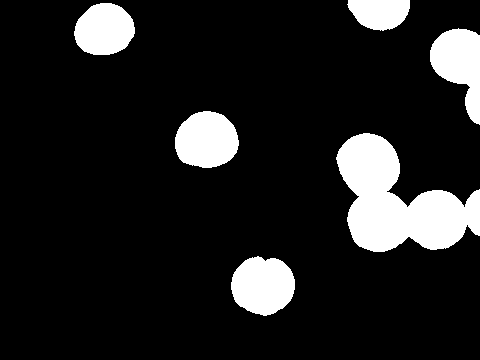

Aca hago erosion


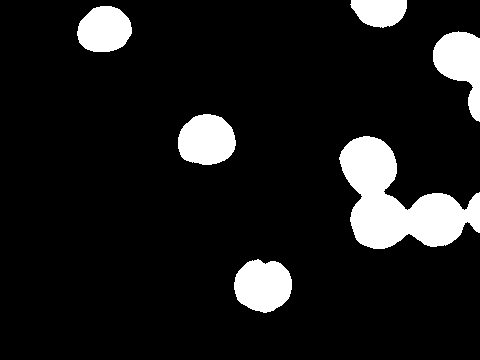

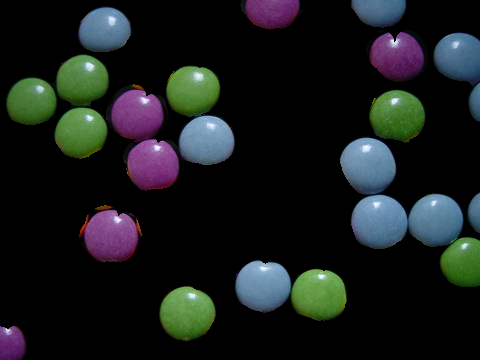

In [ ]:
from google.colab.patches import cv2_imshow  # Importa cv2_imshow desde google.colab.patches
from skimage.morphology import disk, rectangle, ball

# Define las funciones fun_erode y fun_dilate
def fun_erode(mask,k):
  '''
  Aplica la operación morfológica de erosión e imprime un mensaje que se realizó la operación.
  ---------------------------------------
  Args:
    mask (Array):     La imagen de entrada en formato Numpy array
    k (int):          Radio del disco en que se plicará la máscara

  ---------------------------------------
  Returns:
    mask (Array):     La imagen resultante después de aplicar la operación morfológica erosión.
  '''
  kernel = disk(k)
  #kernel = rectangle(1,4)
  mask = cv2.erode(mask, kernel, iterations=1)
  print('Aca hago erosion')
  return mask


def fun_dilate(mask,k):
  '''
  Aplica la operación morfológica de dilatación e imprime un mensaje que se realizó la operación.
  ---------------------------------------
  Args:
    mask (Array):     La imagen de entrada en formato Numpy array
    k (int):          Radio del disco en que se plicará la máscara

  ---------------------------------------
  Returns:
    mask (Array):     La imagen resultante después de aplicar la operación morfológica erosión.
  '''
  kernel = disk(k)
  #kernel = rectangle(1,2)
  mask = cv2.dilate(mask, kernel, iterations=1)
  print('Aca hago dilatacion')
  return mask

def mostrar_caramelos():
  """
  Muestra los caramelos del color especificado por el usuario en una imagen, aplicando filtros morfológicos.

  Returns:
    None
  """

  # Solicitar al usuario que ingrese el color
  color = input("Ingrese el color de los caramelos (puede ser 'amarillo', 'verde', 'azul', 'purpura', 'rosado', 'rojo', 'naranja' o una combinación de estos colores separados por espacios): ").lower()
  # Separar colores ingresados por el usuario
  colores = color.split()


  # Crear un diccionario de máscaras de colores
  mascaras_colores = {
    'amarillo': cv2.inRange(imghsv, amarillo_bajo, amarillo_alto),
    'verde': cv2.inRange(imghsv, verde_bajo, verde_alto),
    'rojo': cv2.inRange(imghsv, rojo_bajo, rojo_alto),
    'azul': cv2.inRange(imghsv, azul_bajo, azul_alto),
    'rosado': cv2.inRange(imghsv, rosado_bajo, rosado_alto),
    'naranja': cv2.inRange(imghsv, naranja_bajo, naranja_alto),
    'morado': cv2.inRange(imghsv, morado_bajo, morado_alto)
  }


  # Crear una imagen en blanco del mismo tamaño que la imagen de los caramelos
  imagen_caramelos = cv2.imread('/content/Colors_.jpg')  # Reemplaza 'imagen_de_caramelos.jpg' con tu imagen
  resultado = np.zeros_like(imagen_caramelos)

  # Aplicar filtros morfológicos para cada color especificado
  for c in colores:
    if c in mascaras_colores:

      # Filtrar el color en el espacio HSV
      hsv = cv2.cvtColor(imagen_caramelos, cv2.COLOR_BGR2HSV)

      # Obtener la máscara del color del diccionario
      mask = mascaras_colores[c]
      print("En formato HSV")
      cv2_imshow(mask)

      ########################################## MORADO ##################################
      if(c == 'morado'):

        # Primero: Aplicamos erosión grande para limpiar impurezas
        mask = fun_erode(mask, 7)
        cv2_imshow(mask)

        # Segundo: Aplicamos diltacion para rellenar
        mask = fun_dilate(mask, 9)
        cv2_imshow(mask)

        # Tercero: Aplicamos diltacion rectangular para los bordes de encima
        mask = fun_dilate(mask, 3)
        cv2_imshow(mask)

      ########################################## ROJO ##################################
      elif(c == 'rojo'):
        print("ENTRE A ROJO")
        # Aplicar erosión y dilatación para limpiar residuos

        # Primero: Aplicamos erosión para limpiar impurezas
        mask = fun_erode(mask, 2)
        cv2_imshow(mask)

        # Segundo: Aplicamos dilatación grande para rellenar
        mask = fun_dilate(mask, 7)
        cv2_imshow(mask)

        # Tercero: Aplicamos dilatación pequeña para rellenar huecos negros (pequeños)
        mask = fun_dilate(mask, 3)
        cv2_imshow(mask)

        # Cuarto: Aplicamos erosión pequeña para quitar bordes
        mask = fun_erode(mask, 10)
        cv2_imshow(mask)

        # Quinto: Aplicamos dilatación pequeña para corregir bordes
        mask = fun_dilate(mask, 6)
        cv2_imshow(mask)

      ########################################## VERDE ##################################
      elif(c == 'verde'):
        print("ENTRE AL VERDE")
        # Aplicar erosión y dilatación para limpiar residuos

        # Primero: Aplicamos erosión para limpiar impurezas
        mask = fun_erode(mask, 3)
        cv2_imshow(mask)

        # Segundo: Aplicamos dilatación para rellenar huecos negros (pequeños)
        mask = fun_dilate(mask, 8)
        cv2_imshow(mask)

        # Tercero: Aplicamos una segunda erosion para eliminar bordes
        mask = fun_erode(mask, 4)
        cv2_imshow(mask)


      else:
        # Aplicar erosión y dilatación para limpiar residuos

        # Primero: Aplicamos erosión para limpiar impurezas
        mask = fun_erode(mask, 3)
        cv2_imshow(mask)

        # Segundo: Aplicamos dilatación para rellenar huecos negros (pequeños)
        mask = fun_dilate(mask, 5)
        cv2_imshow(mask)

        # Tercero: Aplicamos una segunda dilatación más pequeña para rellenar huecos
        mask = fun_dilate(mask, 2)
        cv2_imshow(mask)

        # Cuarto: Aplicamos una segunda erosión más grande para eliminar los bordes
        mask = fun_erode(mask, 3)
        cv2_imshow(mask)

      # Crear una imagen con solo los caramelos del color especificado
      color_caramelos = cv2.bitwise_and(imagen_caramelos, imagen_caramelos, mask=mask)

      # Agregar los caramelos del color especificado al resultado
      resultado = cv2.add(resultado, color_caramelos)

  # Mostrar la imagen resultante
  cv2_imshow(resultado)  # Utiliza cv2_imshow en lugar de cv2.imshow

# Ejemplo de uso
mostrar_caramelos()

### 2. Construir una función debidamente documentada, que reciba un parámetro llamado "Operacion_Morfologica", el cual permitirá indicar a cual de los siguientes cuatro estados se quiere llevar la imagen "original". Lo anterior aplicando las cuatro operaciones morfólogicas vistas en clase.(10%)

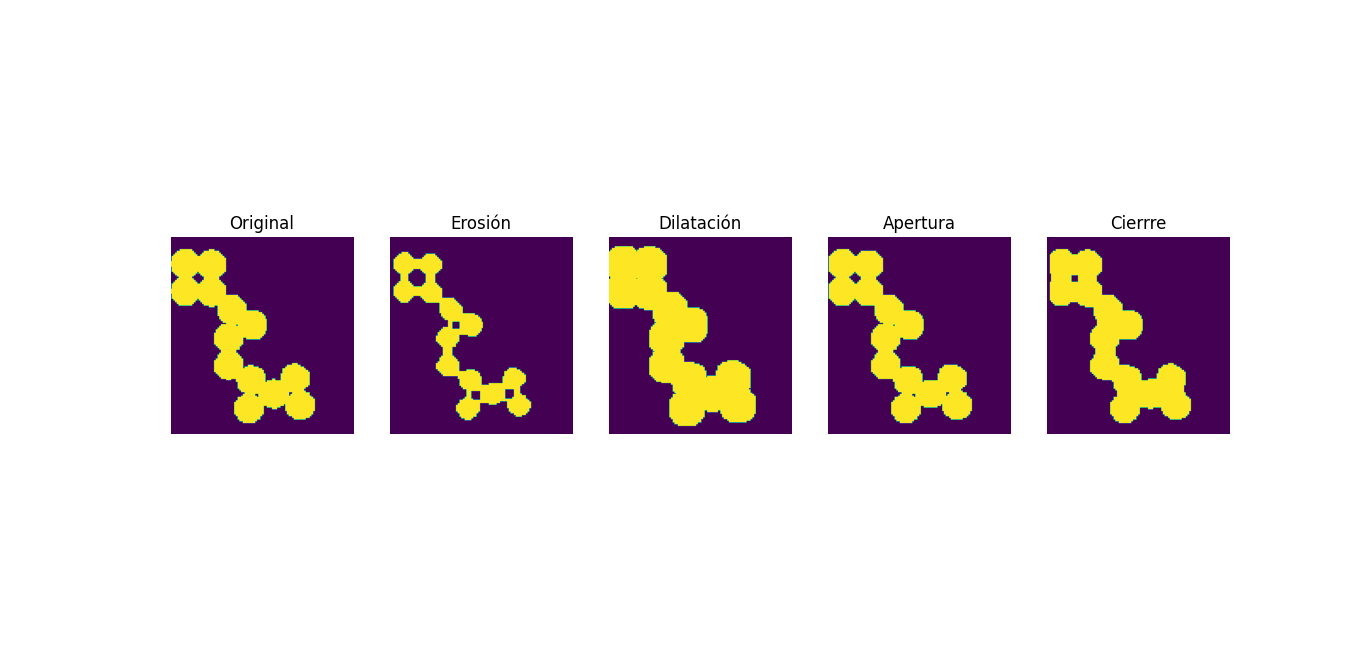

In [ ]:
import numpy as np

def apply_morphological_operations(image_original,struct_element, operacion_morfologica):
  '''
  Aplica operaciones morfológicas a una imagen en escala de grises.
  ---------------------------------------
  Args:
    image_original (Array):           La imagen de entrada en formato Numpy array
    struct_element (Array):           Región de aplicación de la operación morfológica
    operacion_morfologica (String):   Cadena que indica la operación morfológica

  ---------------------------------------
  Returns:
    result (Array):                   La imagen resultante después de aplicar la operación morfológica seleccionada
  '''
  # Asegurarse de que la operación morfológica especificada es válida
  if operacion_morfologica not in ['erosion', 'dilatacion', 'apertura', 'cierre']:
    raise ValueError('Operacion morfologica no valida. Sus opciones son: erosion, dilatacion, apertura, cierre')

  if(operacion_morfologica == 'erosion'):
    # Obtiene las dimensiones de la imagen de entrada y del elemento estructurado
    rows, cols = image_original.shape
    struct_rows, struct_cols = struct_element.shape

    # Crea una copia de la imagen original donde se almacenará el resultado
    result = image_original.copy()

    # Calcula el centro del elemento estructurante
    struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

    # Itera el elemento estructurante sobre la imagen original
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) de la imagen original utilizando el elemento estructurante
        roi = image_original[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica AND entre la ROI y el elemento estructurante

        # Si todos los px coinciden (es decir, son 1 en ambos) el resultado será True
        if np.all(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result[i, j] = roi.max()

        # Si NO todos los px coinciden
        else:
          # Asigna el valor mínimo de la ROI al px de resultado
          result[i, j] = roi.min()

    # Devuelve la imagen resultante después de la erosión
    return result



  elif(operacion_morfologica == 'dilatacion'):
    # Obtiene las dimensiones de la imagen de entrada y del elemento estructurado
    rows, cols = image_original.shape
    struct_rows, struct_cols = struct_element.shape

    # Crea una copia de la imagen original donde se almacenará el resultado
    result = image_original.copy()

    # Calcula el centro del elemento estructurante
    struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

    # Itera el elemento estructurante sobre la imagen original
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) de la imagen original utilizando el elemento estructurante
        roi = image_original[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica OR entre la ROI y el elemento estructurante

        # Si al menos un px coincide (es decir, es 1 en alguno de los dos) el resultado será True
        if np.any(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result[i, j] = roi.max()

    # Devuelve la imagen resultante después de la erosión
    return result





  elif(operacion_morfologica == 'apertura'):
    # 1. Aplicamos erosión


    # Obtiene las dimensiones de la imagen de entrada y del elemento estructurado
    rows, cols = image_original.shape
    struct_rows, struct_cols = struct_element.shape

    # Crea una copia de la imagen original donde se almacenará el resultado
    result = image_original.copy()

    # Calcula el centro del elemento estructurante
    struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

    # Itera el elemento estructurante sobre la imagen original
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) de la imagen original utilizando el elemento estructurante
        roi = image_original[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica OR entre la ROI y el elemento estructurante

        # Si todos los px coinciden (es decir, son 1 en ambos) el resultado será True
        if np.all(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result[i, j] = roi.max()

        # Si NO todos los px coinciden
        else:
          # Asigna el valor mínimo de la ROI al px de resultado
          result[i, j] = roi.min()



    # 2. Aplicamos dilatación

    result2 = result.copy()

    # Itera el elemento estructurante sobre el resultado de la erosión
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) del resultado de la erosión utilizando el elemento estructurante
        roi = result[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica AND entre la ROI y el elemento estructurante

        # Si al menos un px coincide (es decir, es 1 en alguno de los dos) el resultado será True
        if np.any(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result2[i, j] = roi.max()

    # Devuelve la imagen resultante después de la erosión
    return result2




  elif(operacion_morfologica == 'cierre'):
    # 1. Aplicamos dilatación


    # Obtiene las dimensiones de la imagen de entrada y del elemento estructurado
    rows, cols = image_original.shape
    struct_rows, struct_cols = struct_element.shape

    # Crea una copia de la imagen original donde se almacenará el resultado
    result = image_original.copy()

    # Calcula el centro del elemento estructurante
    struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

    # Itera el elemento estructurante sobre la imagen original
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) de la imagen original utilizando el elemento estructurante
        roi = image_original[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica OR entre la ROI y el elemento estructurante

        # Si al menos un px coincide (es decir, es 1 en alguno de los dos) el resultado será True
        if np.any(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result[i, j] = roi.max()



    # 2. Aplicamos erosión

    result2 = result.copy()

    # Itera el elemento estructurante sobre el resultado de la dilatación
    for i in range(struct_center_row, rows - struct_center_row):
      for j in range(struct_center_col, cols - struct_center_col):
        # Extrae la region de interes (ROI) de el resultado de la dilatación utilizando el elemento estructurante
        roi = result[i - struct_center_row: i + struct_center_row + 1,
                    j - struct_center_col: j + struct_center_col + 1]

        # Realiza la operación lógica AND entre la ROI y el elemento estructurante

        # Si todos los px coinciden (es decir, son 1 en ambos) el resultado será True
        if np.all(roi*struct_element):
          # Asigna el valor máximo de la ROI al px de resultado
          result2[i, j] = roi.max()

    # Devuelve la imagen resultante después de la erosión
    return result2

<Figure size 640x480 with 0 Axes>

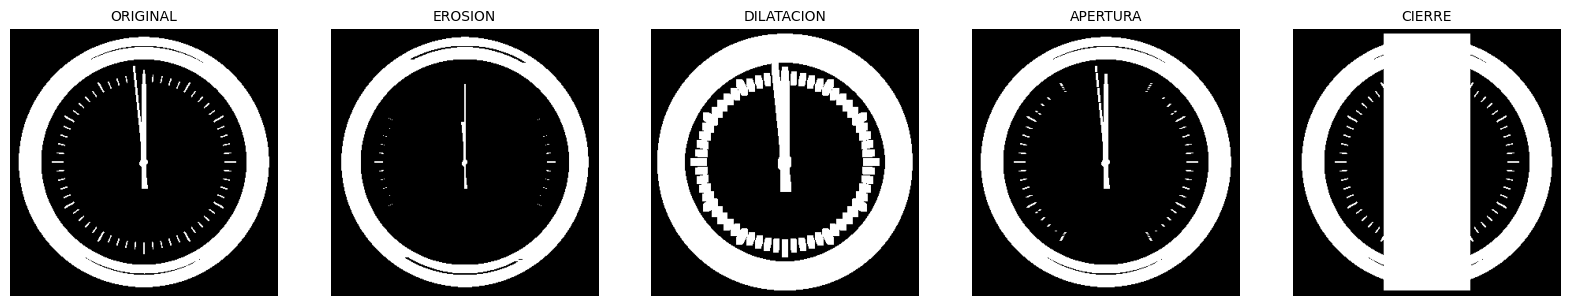

In [ ]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray,rgba2rgb
import matplotlib.pylab as pylab
from skimage.morphology import rectangle, disk

path='/content/images/'
def plot_image(image, title=''):
    pylab.title(title, size=10), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

im = rgb2gray(imread(path+'clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1

# Asignamos las imágenes en escala de grises
pylab.gray()

# Tamaño de la figura
pylab.figure(figsize=(20,20))


# Imagen original
pylab.subplot(1,5,1), plot_image(im, 'ORIGINAL')

# Imagen con erosión
struct_element =rectangle(1,5)
im1 = apply_morphological_operations(im, struct_element, 'erosion')
pylab.subplot(1,5,2), plot_image(im1, 'EROSION')

# Imagen con dilatación
struct_element =rectangle(9,7)
im2 = apply_morphological_operations(im, struct_element, 'dilatacion')
pylab.subplot(1,5,3), plot_image(im2, 'DILATACION')

# Imagen con apertura
struct_element =rectangle(1,3)
im2 = apply_morphological_operations(im, struct_element, 'apertura')
pylab.subplot(1,5,4), plot_image(im2, 'APERTURA')

# Imagen con cierre
struct_element =rectangle(9,231)
im2 = apply_morphological_operations(im, struct_element, 'cierre')
pylab.subplot(1,5,5), plot_image(im2, 'CIERRE')
pylab.show()

El elemento de estructura debe ser impar filas y columnas para poder sacar la mitad

<Figure size 640x480 with 0 Axes>

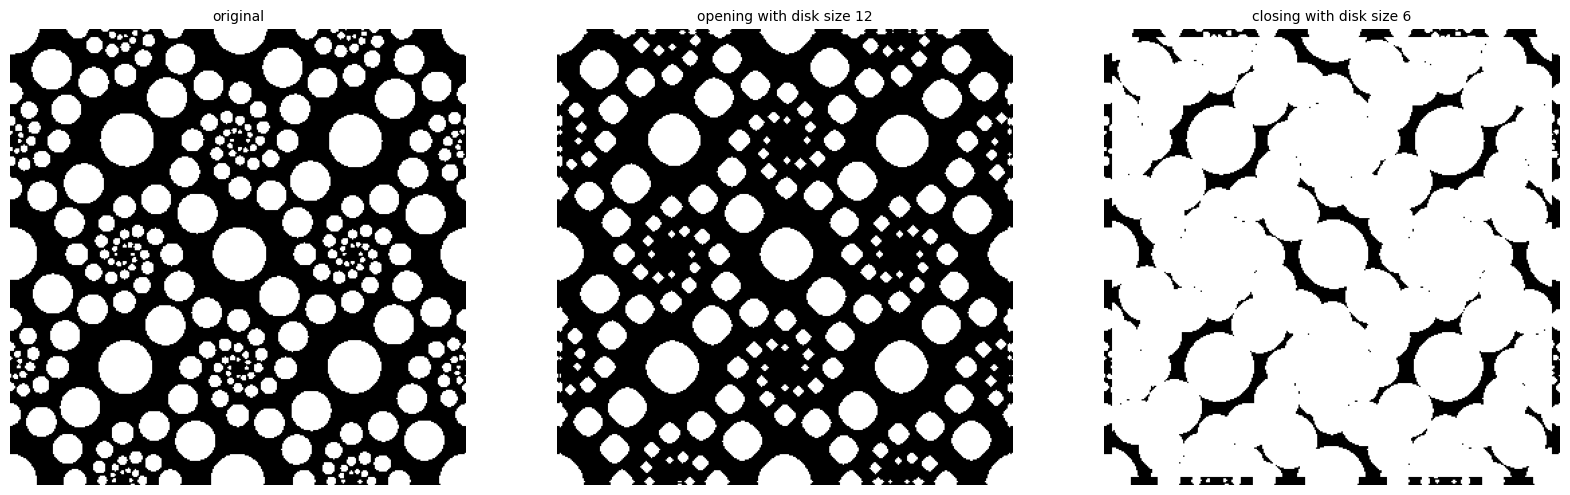

In [ ]:
im = rgb2gray(imread(path+'circles.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1


pylab.gray()
pylab.figure(figsize=(20,10))
# Original
pylab.subplot(1,3,1), plot_image(im, 'original')
# Apertura
im1 = apply_morphological_operations(im, disk(2),'apertura')
pylab.subplot(1,3,2), plot_image(im1, 'opening with disk size ' + str(12))
# Cierre
im2 = apply_morphological_operations(im, disk(6),'cierre')
pylab.subplot(1,3,3), plot_image(im2, 'closing with disk size ' + str(6))
pylab.show()

### 3. Construir una clase debidamente documentada, que tenga como atributo una imagen y tenga métodos que permitan hacer cada una de las siguientes **transformaciones rígidas**: Transformación de traslación, transformación euclidea, transformación de similaridad y transformación proyectiva. Además, dicha clase también debe tener un método que permita graficar la imagen original junto con cualquiera de las transformaciones mencionadas.

Los métodos de la clase que permiten hacer las respectivas trasnformaciones a la imagen, deben ser construidos a pedal (con las ecuaciones vistas en clase), es decir, no se permiten utilizar paquetes de python que ya traen funciones incorporadas para dicho fin.(10%)

In [ ]:
class RigidTransformations:
  '''
  Clase para aplicar transformaciones rígidas a una imagen en escala de grises
  ---------------------------------------
  Attributtes:
    image (Array):           La imagen en escala de grises de entrada en formato Numpy array

  ---------------------------------------
  Methods:
    __init__(self,image):
      Inicializa la clase ImageProcessor con una imagen en escala de grises

    translation(self,tx,ty):
      Translada una imagen de un punto a otra coordenada.

    euclidean(self,theta,tx,ty):
      Rota una imagen a un angulo theta.

    similarity(self,theta,tx,ty,s):
      Aplica traslacion y rotacion con un factor de escala de la imagen.

    projective(self,matrix):
      Aplica transformacion proyectiva a una imagen.

    plot_image(self,transformed_image=None):
      # Grafica la imagen original junto con la transformada
      ---------------------------------------
      Args:
        transformed_image (Array,opcional): Matriz con la transformacion proyectiva

  ---------------------------------------
  Ejemplos de uso:
    # Cargar una imagen de ejemplo
    image = cv2.imread('parrot.jpg')[...,::-1]

    # Crear una instancia de la clase ImageTransformation
    image_transformer = ImageTransformation(image)

    # Aplicar una transformación de traslación
    translated_image = image_transformer.translation(100, 150)

    # Aplicar una transformación euclidiana
    euclidean_image = image_transformer.euclidean(25*np.pi/180, 0, 0)

    # Aplicar una transformación de similitud
    similarity_image = image_transformer.similarity(-25*np.pi/180, 500 , 100 , 0.5)

    # Aplicar una transformación proyectiva (matriz de transformación 3x3, reemplaza con la tuya)
    matrix = np.array([[300.5, 20.2, 7.6], [200.0, 50.0, 4.3], [37.50, 4.0, 23.2]])
    projective_image = image_transformer.projective(matrix)

    # Graficar la imagen original junto con las transformaciones
    image_transformer.plot_image(translated_image)
    image_transformer.plot_image(euclidean_image)
    image_transformer.plot_image(similarity_image)
    image_transformer.plot_image(projective_image)
  '''

  def __init__(self,image):
    '''
    Inicializa la clase ImageProcessor con una imagen en escala de grises
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    '''
    self.image = image

  def translation(self, dx, dy):
    '''
    Translada una imagen de un punto a otra coordenada.
    ---------------------------------------
    Args:
      tx (int): Traslacion en x
      ty (int): Traslacion en y
    '''

    height, width = self.image.shape[:2]  # Cambio aquí
    translated_image = np.zeros_like(self.image)

    for x in range(width):
      for y in range(height):
        if 0 <= x - dx < width and 0 <= y - dy < height:
          translated_image[y, x] = self.image[y - dy, x - dx]

    return translated_image

  def euclidean(self, theta, tx, ty):
    '''
    Rota una imagen a un angulo theta.
      ---------------------------------------
    Args:
      theta (float): Angulo de rotacion en grados
      tx (int): Traslacion en x
      ty (int): Traslacion en y
    '''
    height, width = self.image.shape[:2]
    euclidean_image = np.zeros_like(self.image)

    for x in range(width):
      for y in range(height):
        new_x = int(x * np.cos(theta) - y * np.sin(theta) + tx)
        new_y = int(x * np.sin(theta) + y * np.cos(theta) + ty)

        if 0 <= new_x < width and 0 <= new_y < height:
          euclidean_image[y, x] = self.image[new_y, new_x]

    return euclidean_image

  def similarity(self, theta, tx, ty, s):
    '''
    Aplica traslacion y rotacion con un factor de escala de la imagen.
    ---------------------------------------
    Args:
      theta (float): Angulo de rotacion en grados
      tx (int): Traslacion en x
      ty (int): Traslacion en y
      s (float): Factor de escalamiento de la imagen
    '''

    # Obtener las dimensiones de la imagen
    height, width = self.image.shape[:2]

    # Crear una imagen vacía para la imagen transformada
    similarity_image = np.zeros_like(self.image)

    for x in range(width):
      for y in range(height):
        punto_original = np.array([x, y, 1], dtype=np.float32)

        M = np.array([
                      [s * np.cos(theta), -s * np.sin(theta), tx],
                      [s * np.sin(theta), s * np.cos(theta), ty],
                      [0, 0, 1]
        ], dtype=np.float32)

        punto_transformado = np.dot(M, punto_original)
        x_transformado, y_transformado = punto_transformado[:2].astype(int)

        if 0 <= x_transformado < width and 0 <= y_transformado < height:
          similarity_image[y_transformado, x_transformado] = self.image[y, x]

    return similarity_image

  def projective(self, matrix):
    '''
    Aplica transformacion proyectiva a una imagen.
    ---------------------------------------
    Args:
      matrix: Matriz con la transformacion proyectiva
    '''

    height, width = self.image.shape[:2]  # Cambio aquí
    projective_image = np.zeros_like(self.image)

    for x in range(width):
      for y in range(height):
        homogenous_coord = np.array([x, y, 1], dtype=np.float32)
        new_coord = np.dot(matrix, homogenous_coord)
        new_x, new_y, new_w = new_coord / new_coord[2]

        if 0 <= new_x < width and 0 <= new_y < height:
          projective_image[y, x] = self.image[int(new_y), int(new_x)]

    return projective_image

  def plot_image(self, transformed_image=None):
    '''
    Grafica la imagen original junto con la transformada
    ---------------------------------------
    Args:
      transformed_image (Array,opcional): Matriz con la transformacion proyectiva
    '''

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(self.image, cmap='gray')
    plt.title('Imagen Original')

    if transformed_image is not None:
      plt.subplot(1, 2, 2)
      plt.imshow(transformed_image, cmap='gray')
      plt.title('Imagen Transformada')

    plt.show()

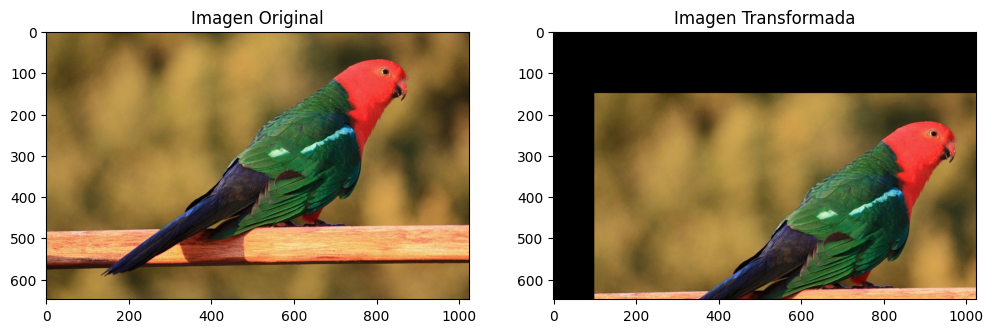

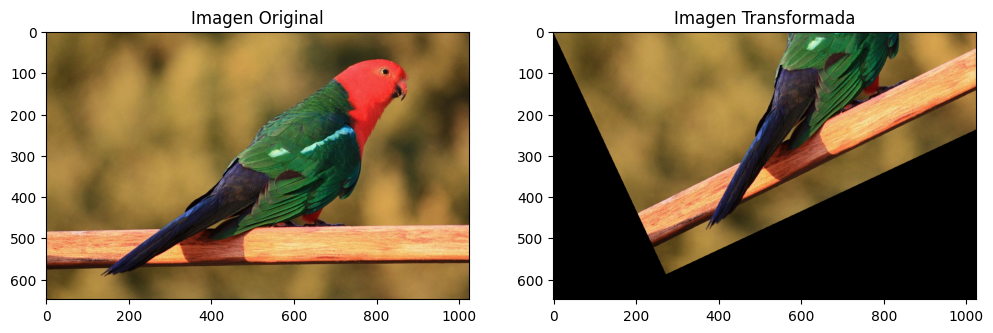

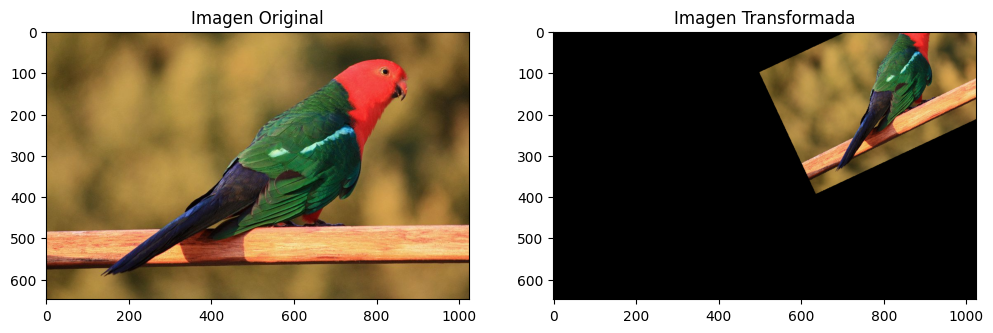

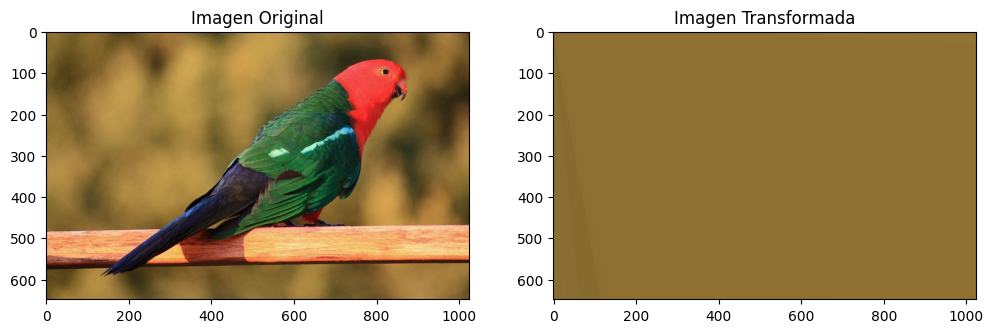

In [ ]:
# Cargar una imagen de ejemplo (reemplaza con tu propia imagen)
image = cv2.imread('parrot.jpg')[...,::-1]

# Crear una instancia de la clase RigidTransformations
image_transformer = RigidTransformations(image)

# Aplicar una transformación de traslación
translated_image = image_transformer.translation(100, 150)

# Aplicar una transformación euclidiana
euclidean_image = image_transformer.euclidean(25*np.pi/180, 0, 0)

# Aplicar una transformación de similitud
similarity_image = image_transformer.similarity(-25*np.pi/180, 500 , 100 , 0.5)

# Aplicar una transformación proyectiva (matriz de transformación 3x3, reemplaza con la tuya)
matrix = np.array([[300.5, 20.2, 7.6], [200.0, 50.0, 4.3], [37.50, 4.0, 23.2]])
projective_image = image_transformer.projective(matrix)

# Graficar la imagen original junto con las transformaciones
image_transformer.plot_image(translated_image)
image_transformer.plot_image(euclidean_image)
image_transformer.plot_image(similarity_image)
image_transformer.plot_image(projective_image)

### 4. Hacer un resumen de los algoritmos más utilizados para hacer **transformaciones no rígidas:**

* [SIFT](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) (Scale-invariant feature transform)
* [SURF](https://people.ee.ethz.ch/~surf/eccv06.pdf) (Speeded Up Robust Features)
* [ORB](http://www.gwylab.com/download/ORB_2012.pdf) (Oriented BRIEF)

###1) SIFT (Scale-Invariant Feature Transform):
* **Descripción:** SIFT es un algoritmo diseñado para detectar y describir características locales en una imagen que son invariantes a cambios de escala, rotación y cambios en la iluminación. Fue desarrollado por David Lowe en 1999.

* **Proceso:** SIFT opera en múltiples escalas y utiliza pirámides de imágenes para encontrar puntos clave (keypoints) que representan características distintivas. Luego, genera descriptores vectoriales para cada punto clave basados en gradientes locales.

* **Aplicaciones:** SIFT se utiliza en una amplia gama de aplicaciones, como la coincidencia de imágenes, el seguimiento de objetos, la reconstrucción 3D y el reconocimiento de objetos.

###2) SURF (Speeded Up Robust Features):
* **Descripción:** SURF es un algoritmo que comparte similitudes con SIFT, pero se centra en ser más rápido y eficiente computacionalmente. Fue propuesto por Bay, Tuytelaars, y Van Gool en 2006.

* **Proceso:** SURF utiliza una aproximación integral para calcular los descriptores, lo que acelera significativamente la detección y descripción de características. Además, utiliza filtros Hessianos para detectar puntos de interés.

* **Aplicaciones:** SURF se utiliza en aplicaciones en tiempo real donde la velocidad es crítica, como el seguimiento de objetos en video, la detección de objetos y la realidad aumentada.

###3) ORB (Oriented BRIEF):
* **Descripción:** ORB es un algoritmo diseñado para combinar la eficiencia de cómputo de algoritmos como SURF con la simplicidad de descriptores binarios como BRIEF. Fue desarrollado por Ethan Rublee y otros en 2011.

* **Proceso:** ORB utiliza un detector rápido de puntos clave basado en la esquina de Harris y genera descriptores binarios para estos puntos utilizando una versión modificada de la prueba binaria de patrones (BRIEF). Además, ORB incluye información sobre la orientación de los puntos clave.

* **Aplicaciones:** ORB se utiliza en aplicaciones donde se necesita una combinación de eficiencia y precisión, como la detección y seguimiento de objetos en tiempo real, la navegación de robots y la localización simultánea y mapeo (SLAM).

### 5. Cree una clase en Python que acepte una imagen en escala de grises como entrada y proporcione métodos para aplicar varios filtros de procesamiento de imágenes, incluyendo Sobel, Scharr, Laplace, Roberts, Prewitt y un filtro personalizado.(10%)

**Requisitos:**

1. **Clase de Procesamiento de Imágenes:**
   - Cree una clase llamada `ImageProcessor` que acepte una imagen en escala de grises como entrada durante la inicialización de la clase.
   - La imagen se puede representar como una matriz NumPy 2D, donde cada elemento de la matriz corresponde a un píxel en la imagen en escala de grises.

2. **Métodos de Filtros:**
   - Implemente métodos dentro de la clase `ImageProcessor` para aplicar los siguientes filtros:
     - Filtro Sobel.
     - Filtro Scharr.
     - Filtro Laplace.
     - Filtro Roberts.
     - Filtro Prewitt.
     - Filtro personalizado: Permita que el usuario defina una matriz de convolución personalizada y aplique el filtro a la imagen.

3. **Resultado de los Filtros:**
   - Los métodos de filtros deben devolver una nueva imagen en escala de grises que representa el resultado de aplicar el filtro correspondiente.
   - La nueva imagen se puede representar como una matriz NumPy 2D.

4. **Documentación y Ejemplos:**
   - Proporcione documentación clara y comentarios en el código para explicar cómo usar la clase `ImageProcessor` y sus métodos.
   - Proporcione ejemplos de cómo cargar una imagen en escala de grises, crear una instancia de la clase `ImageProcessor` y aplicar los diferentes filtros.

**Ejemplo de Uso:**

```python
# Crear una instancia de ImageProcessor con una imagen en escala de grises
processor = ImageProcessor(grayscale_image)

# Aplicar el filtro Sobel
sobel_result = processor.apply_sobel()

# Aplicar el filtro Scharr
scharr_result = processor.apply_scharr()

# Aplicar el filtro Laplace
laplace_result = processor.apply_laplace()

# Aplicar el filtro Roberts
roberts_result = processor.apply_roberts()

# Aplicar el filtro Prewitt
prewitt_result = processor.apply_prewitt()

# Aplicar un filtro personalizado
custom_filter = [[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]]
custom_result = processor.apply_custom_filter(custom_filter)
```

In [ ]:
from scipy import signal

class ImageProcessor:
  '''
  Clase para el procesamiento de imágenes en escala de grises
  ---------------------------------------
  Attributtes:
    image (Array):           La imagen en escala de grises de entrada en formato Numpy array

  ---------------------------------------
  Methods:
    __init__(self,image):
      Inicializa la clase ImageProcessor con una imagen en escala de grises

    apply_sobel(self):
      Aplica el filtro Sobel a la imagen y devuelve el resultado de gradiente de magnitud

    apply_scharr(self):
      Aplica el filtro Scharr a la imagen y devuelve el resultado de gradiente de magnitud

    apply_laplace(self):
      Aplica el filtro Laplace a la imagen y devuelve el resultado de gradiente de magnitud

    apply_roberts(self):
      Aplica el filtro Roberts a la imagen y devuelve el resultado de gradiente de magnitud

    apply_prewitt(self):
      Aplica el filtro Prewitt a la imagen y devuelve el resultado de gradiente de magnitud

    appy_custom_filter(self, custom_filter):
      Aplica un filtro de convolución personalizado y devuelve el resultado de gradiente de magnitud

  ---------------------------------------
  Ejemplos de uso:
    # Crear una instancia de ImageProcessor con una imagen en escala de grises
    processor = ImageProcessor(grayscale_image)

    # Aplicar el filtro Sobel
    sobel_result = processor.apply_sobel()

    # Aplicar el filtro Scharr
    scharr_result = processor.apply_scharr()

    # Aplicar el filtro Laplace
    laplace_result = processor.apply_laplace()

    # Aplicar el filtro Roberts
    roberts_result = processor.apply_roberts()

    # Aplicar el filtro Prewitt
    prewitt_result = processor.apply_prewitt()

    # Aplicar un filtro personalizado
    custom_filter = [[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]]
    custom_result = processor.apply_custom_filter(custom_filter)
  '''

  def __init__(self,image):
    '''
    Inicializa la clase ImageProcessor con una imagen en escala de grises
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    '''
    self.image = image

  def apply_sobel(self):
    '''
    Aplica el filtro Sobel a la imagen y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    ---------------------------------------
    Returns:
      Array: El resultado del filtro Sobel como una matriz numpy
    '''

    sobel_x = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])

    sobel_y = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])

    '''
    Argumentos de la convolución:
      self.image: Imagen en escala de grises
      sobel_x: La convolución que se usa en la imagen
      mode = 'same': La salida tendrá la misma forma (dimensiones) que la imagen de entrada después de aplicar la convolución
      boundary = 'wrap': Para el mannejo de bordes
    '''
    gradient_x = self.apply_convolution(sobel_x)
    gradient_y = self.apply_convolution(sobel_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude



  def apply_scharr(self):
    '''
    Aplica el filtro Scharr a la imagen y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    ---------------------------------------
    Returns:
      Array: El resultado del filtro Scharr como una matriz numpy
    '''

    scharr_x = np.array([[-3,0,3],
                          [-10,0,10],
                          [-3,0,3]])

    scharr_y = np.array([[-3,-10,-3],
                          [0,0,0],
                          [3,10,3]])

    '''
    Argumentos de la convolución:
      self.image: Imagen en escala de grises
      scharr_x: La convolución que se usa en la imagen
      mode = 'same': La salida tendrá la misma forma (dimensiones) que la imagen de entrada después de aplicar la convolución
      boundary = 'wrap': Para el mannejo de bordes
    '''
    gradient_x = self.apply_convolution(scharr_x)
    gradient_y = self.apply_convolution(scharr_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude


  def apply_laplace(self):
    '''
    Aplica el filtro Laplace a la imagen y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    ---------------------------------------
    Returns:
      Array: El resultado del filtro Laplace como una matriz numpy
    '''

    laplace_filter = np.array([[0,-1,0],
                                [-1,4,-1],
                                [0,-1,0]])

    '''
    Argumentos de la convolución:
      self.image: Imagen en escala de grises
      scharr_x: La convolución que se usa en la imagen
      mode = 'same': La salida tendrá la misma forma (dimensiones) que la imagen de entrada después de aplicar la convolución
      boundary = 'wrap': Para el mannejo de bordes
    '''
    laplace_result = np.clip(self.apply_convolution(laplace_filter),0,1) #np.clip() -> Volvemos la imagen binaria

    return laplace_result


  def apply_roberts(self):
    '''
    Aplica el filtro Roberts a la imagen y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    ---------------------------------------
    Returns:
      Array: El resultado del filtro Roberts como una matriz numpy
    '''

    roberts_x = np.array([[1,0],
                          [0,-1]])

    roberts_y = np.array([[0,1],
                          [-1,0]])

    '''
    Argumentos de la convolución:
      self.image: Imagen en escala de grises
      roberts_x: La convolución que se usa en la imagen
      mode = 'same': La salida tendrá la misma forma (dimensiones) que la imagen de entrada después de aplicar la convolución
      boundary = 'wrap': Para el mannejo de bordes
    '''
    gradient_x = self.apply_convolution(roberts_x)
    gradient_y = self.apply_convolution(roberts_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude


  def apply_prewitt(self):
    '''
    Aplica el filtro Prewitt a la imagen y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
    ---------------------------------------
    Returns:
      Array: El resultado del filtro Prewitt como una matriz numpy
    '''

    prewitt_x = np.array([[-1,0,1],
                          [-1,0,1],
                          [-1,0,1]])

    prewitt_y = np.array([[-1,-1,-1],
                          [0,0,0],
                          [1,1,1]])

    '''
    Argumentos de la convolución:
      self.image: Imagen en escala de grises
      prewitt_x: La convolución que se usa en la imagen
      mode = 'same': La salida tendrá la misma forma (dimensiones) que la imagen de entrada después de aplicar la convolución
      boundary = 'wrap': Para el mannejo de bordes
    '''
    gradient_x = self.apply_convolution(prewitt_x)
    gradient_y = self.apply_convolution(prewitt_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude


  def apply_custom_filter(self, custom_filter_x, custom_filter_y = None):
    '''
    Aplica un filtro de convolución personalizado y devuelve el resultado de gradiente de magnitud
    ---------------------------------------
    Args:
      image (Array): La imagen en escala de grises de entrada en formato Numpy array
      custom_filter_x (list): La matriz de convolución personalizada en x como una lista de listas
      custom_filter_y (list, opcional): La matriz de convolución personalizada en y como una lista de listas

    ---------------------------------------
    Returns:
      Array: El resultado del filtro Prewitt como una matriz numpy
    '''


    if custom_filter_y is None:
      gradient_x = self.apply_convolution(custom_filter_x)
      # Deja el gradient_y como None si custom_filter_y es None
      gradient_y = None
    else:
      gradient_x = self.apply_convolution(custom_filter_x)
      gradient_y = self.apply_convolution(custom_filter_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + (gradient_y**2 if gradient_y is not None else 0))

    return gradient_magnitude


  def apply_convolution(self,kernel):
    '''
    Aplica una convolución a los Kernel
    ---------------------------------------
    Args:
      kernel_x (Array): Kernel para la dirección en x
      kernel_y (Array, opcional): Kernel para la dirección en y. None si no se requiere
    ---------------------------------------
    Returns:
      Array: El resultado de la convolución como una matriz numpy
    '''

    # Obtener las dimensiones de la imagen
    height, width = self.image.shape
    # Obtener las dimensiones del Kernel
    k_height, k_width = kernel.shape

    # Calcula el centro del Kernel
    k_height_center, k_width_center = k_height // 2 , k_width // 2

    # Inicializa la matriz del resultado
    result = np.zeros((height,width))

    # Realizamos la convolución
    for i in range(1,height - k_height + 1): # Recorrer las filas de la imagen
      for j in range(1,width - k_width + 1): # Recorrer las columnas de la imagen

        # Ventana de las dimensiones del Kernel
        window = self.image[i:i + k_height, j:j+k_width]
        result[i, j] = np.sum( window * kernel)

    return result



<Figure size 640x480 with 0 Axes>

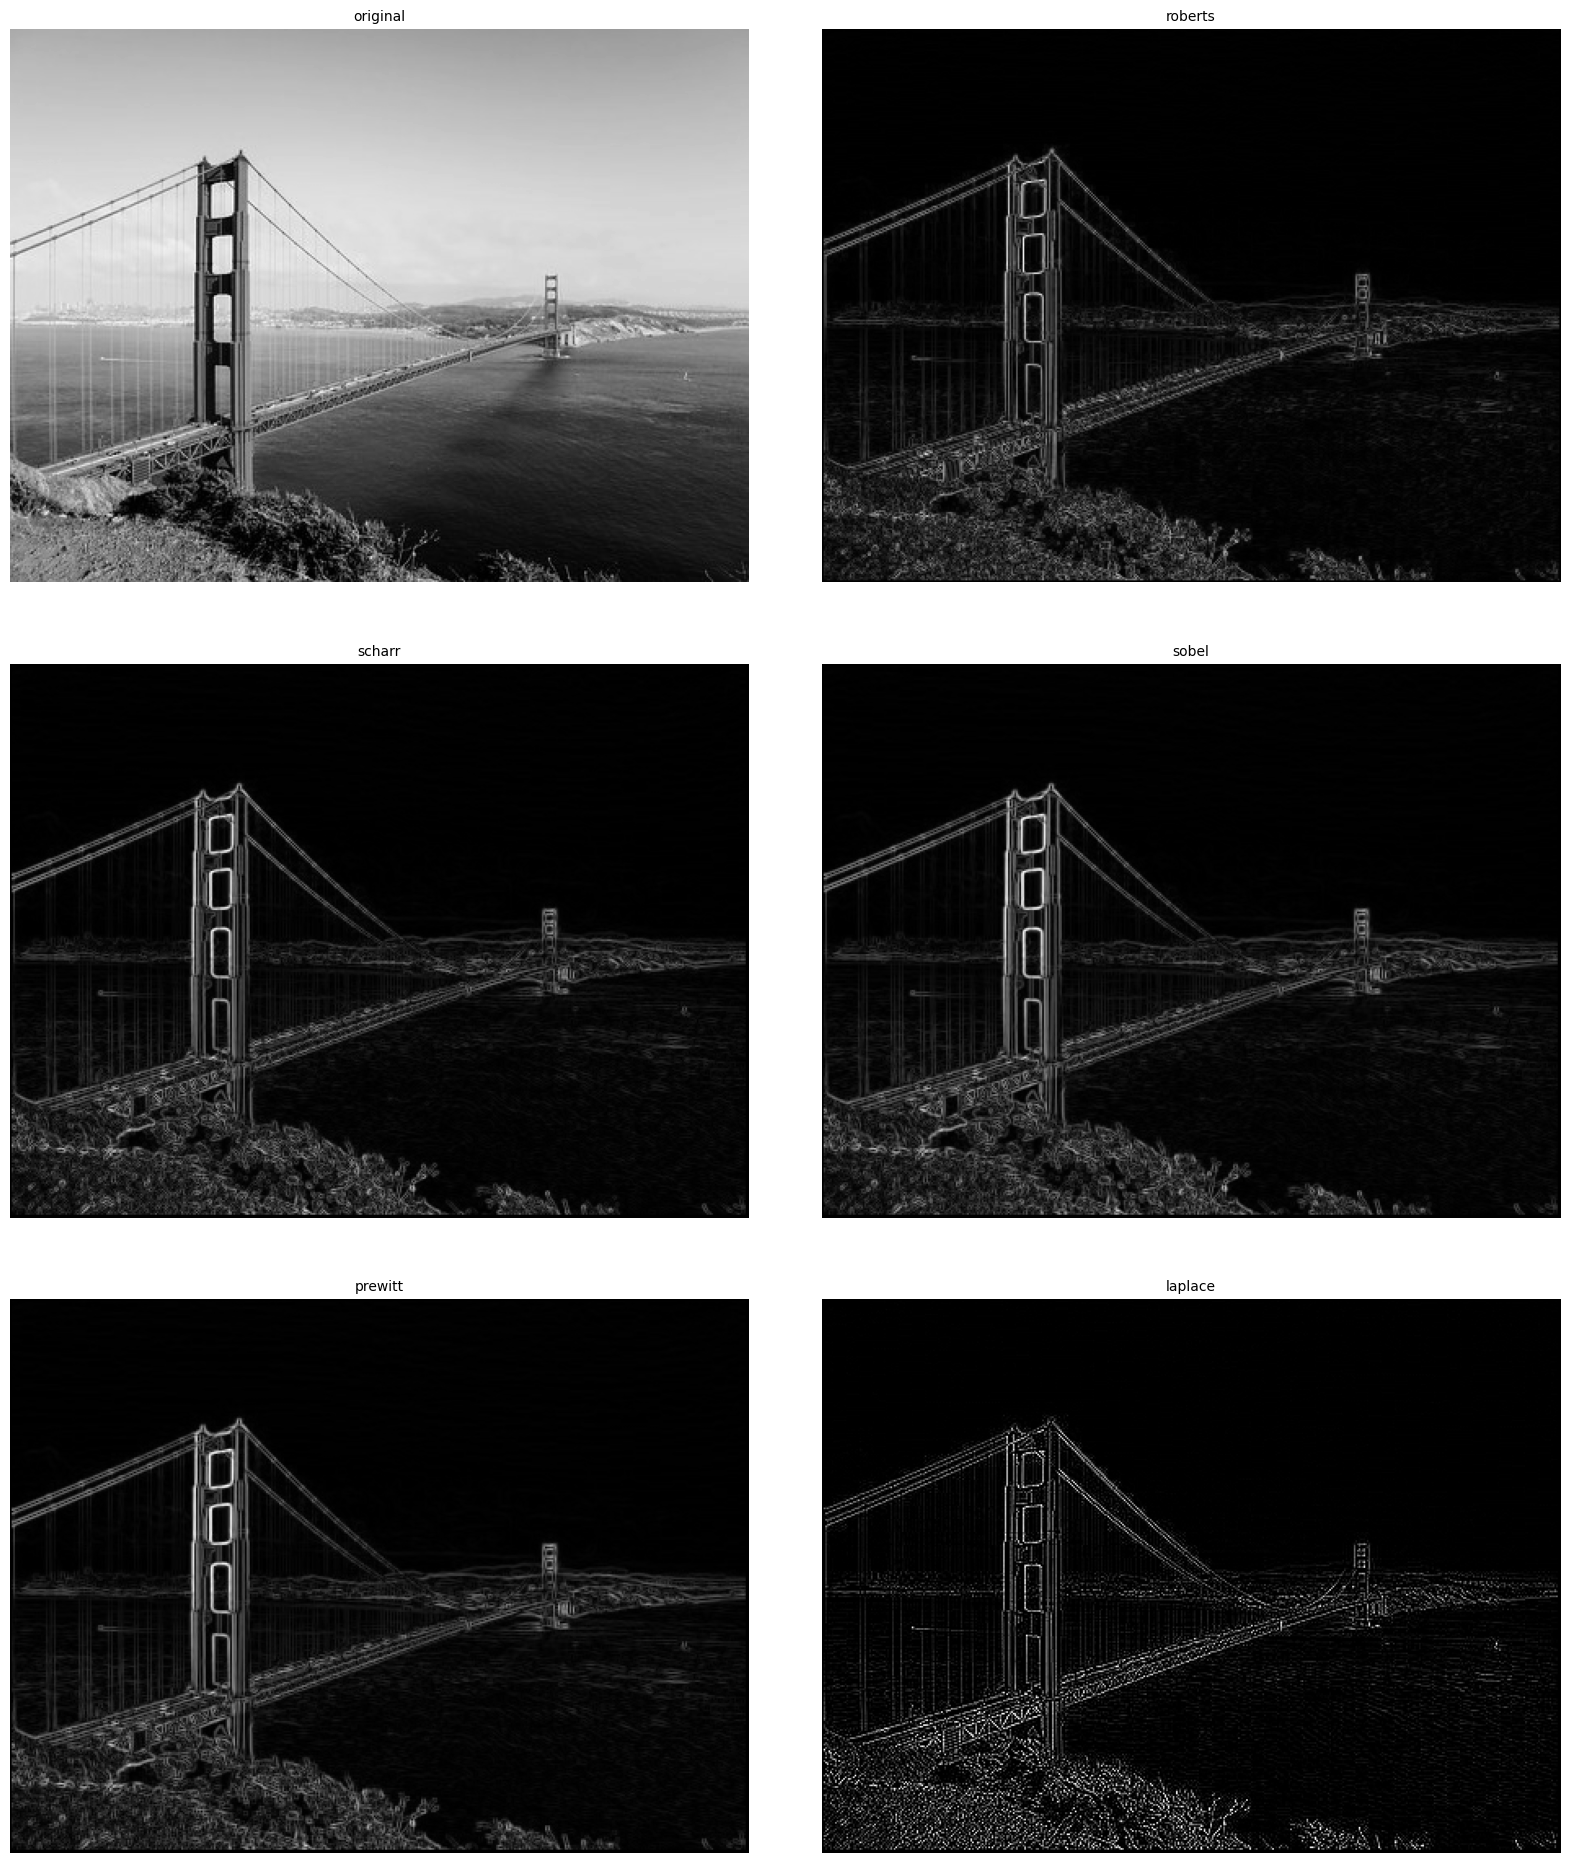

In [ ]:
# RGB image to gray scale
im = rgb2gray(imread(path+'goldengate.jpg'))

# Crear una instancia de ImageProcessor con una imagen en escala de grises
processor = ImageProcessor(im)

# Asignamos las imágenes en escala de grises
pylab.gray()

# Tamaño de la figura
pylab.figure(figsize=(20,24))

# Imagen original
pylab.subplot(3,2,1), plot_image(im, 'original')

# Imagen con filtro Roberts
im1 = processor.apply_roberts()
pylab.subplot(3,2,2), plot_image(im1, 'roberts')

# Imagen con filtro Scharr
im2 = processor.apply_scharr()
pylab.subplot(3,2,3), plot_image(im2, 'scharr')

# Imagen con filtro Sobel
im3 = processor.apply_sobel()
pylab.subplot(3,2,4), plot_image(im3, 'sobel')

# Imagen con filtro Prewitt
im4 = processor.apply_prewitt()
pylab.subplot(3,2,5), plot_image(im4, 'prewitt')

# Imagen con filtro Laplace
im5 = processor.apply_laplace()
pylab.subplot(3,2,6), plot_image(im5, 'laplace')

# Ajustamos los subplots
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

(<Axes: title={'center': 'Custom Filter'}>, None)

<Figure size 640x480 with 0 Axes>

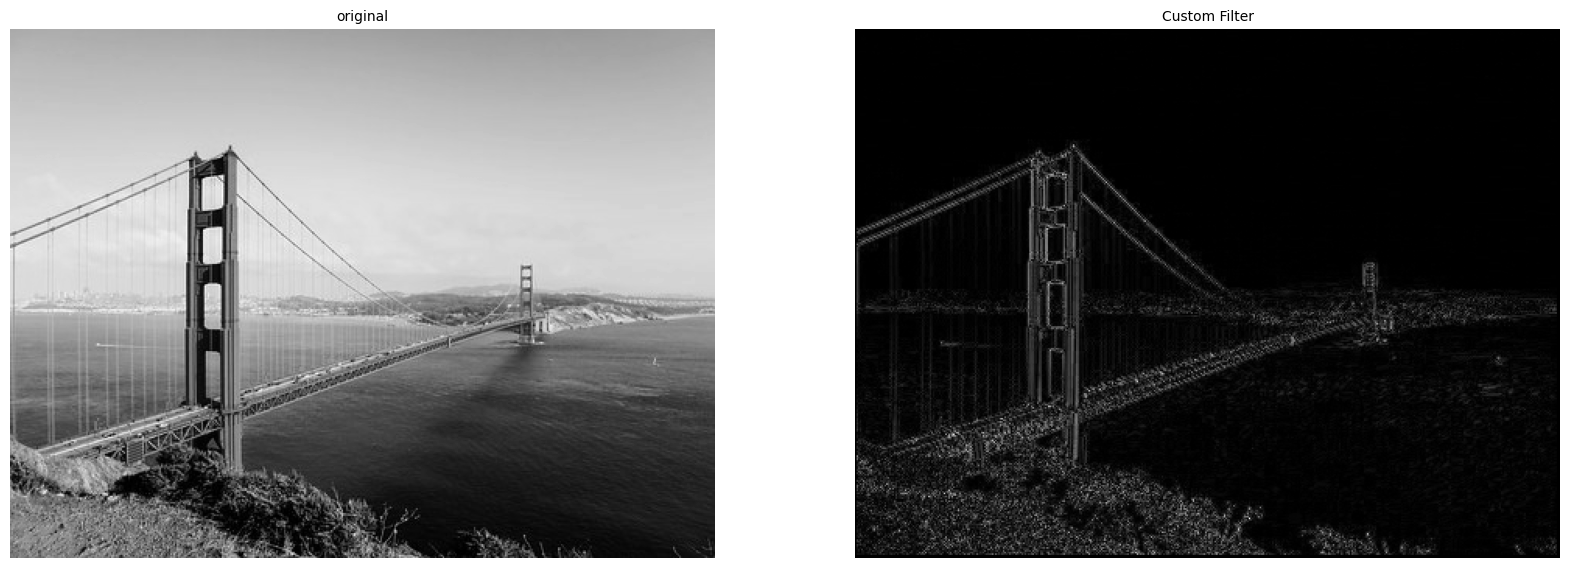

In [ ]:
# Aplicar un filtro personalizado
custom_filter = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])

# Asignamos las imágenes en escala de grises
pylab.gray()

# Tamaño de la figura
pylab.figure(figsize=(20,24))

# Imagen original
pylab.subplot(3,2,1), plot_image(im, 'original')

# Imagen con filtro Personalizado
im1 = processor.apply_custom_filter(custom_filter)
pylab.subplot(3,2,2), plot_image(im1, 'Custom Filter')

**Las imagenes para desarrollar este taller las pueden encontrar en el repositorio de [github del curso](https://github.com/spinedaq/Digital-Image-Processing-Course)**

##**Método de Evaluación del Taller**

La evaluación de este taller constará de dos partes:

- 50% Se evaluará el contenido del taller: Que los ejercicios se hallan desarrollado tal cual lo indican los enunciados, códigos debidamente documentados, buena lógica de programación (tratar de usar en la menor proporción posible listas y ciclos), etc.

- 50% Sustentación del taller: El taller será debidamente sustentado; por tanto cada uno de los integrantes del grupo debe saber sustentar muy bien cada una de las lineas de código de los ejercicios desarrollados y además, estar en la capacidad de hacer modificaciones al código, en caso de ser pedidas el día de la sustentación.

- **Si bien el taller podrá ser presentado en grupos de tres personas, la sustentación del mismo se hará de manera individual.**